In [1]:
# check current path
import os
print(os.getcwd())

# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive/')

path_gdrive = '/content/drive/MyDrive'
os.chdir(path_gdrive)
print(os.getcwd())

/content
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive


In [2]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
thyroid_df = pd.read_csv('thyroidDF_cleaned.csv')

In [5]:
# Encode target variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
thyroid_df['target'] = label_encoder.fit_transform(thyroid_df['target'])

In [6]:
thyroid_df['target'].value_counts()

target
2    1000
1     444
0     169
Name: count, dtype: int64

In [7]:
X = thyroid_df.drop(columns=['target'])
y = thyroid_df['target']

## Neural Network

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
y = to_categorical(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
y_train.shape

(1129, 3)

In [12]:
X_train.shape[1]

20

In [13]:
X_train.shape

(1129, 20)

In [14]:
y_test.shape

(484, 3)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2688      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 11139 (43.51 KB)
Trainable params: 11139 (43.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
36/36 [==============================] - 3s 26ms/step - loss: 18.2365 - accuracy: 0.5545 - val_loss: 1.1184 - val_accuracy: 0.8409
Epoch 2/20
36/36 [==============================] - 0s 11ms/step - loss: 7.6230 - accuracy: 0.6678 - val_loss: 1.4765 - val_accuracy: 0.8161
Epoch 3/20
36/36 [==============================] - 0s 10ms/step - loss: 5.3159 - accuracy: 0.6900 - val_loss: 1.2057 - val_accuracy: 0.8079
Epoch 4/20
36/36 [==============================] - 0s 11ms/step - loss: 3.2814 - accuracy: 0.7449 - val_loss: 1.0325 - val_accuracy: 0.7934
Epoch 5/20
36/36 [==============================] - 0s 12ms/step - loss: 2.7428 - accuracy: 0.7378 - val_loss: 0.5500 - val_accuracy: 0.8554
Epoch 6/20
36/36 [==============================] - 0s 13ms/step - loss: 2.1609 - accuracy: 0.7644 - val_loss: 0.4460 - val_accuracy: 0.8554
Epoch 7/20
36/36 [==============================] - 1s 14ms/step - loss: 1.4417 - accuracy: 0.8034 - val_loss: 0.5076 - val_accuracy: 0.8285
Epoch 8/20
3

In [19]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

16/16 [==============================] - 0s 4ms/step


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 22   0  26]
 [  0 118  11]
 [  2   9 296]]


In [22]:
class_report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.46      0.61        48
           1       0.93      0.91      0.92       129
           2       0.89      0.96      0.92       307

    accuracy                           0.90       484
   macro avg       0.91      0.78      0.82       484
weighted avg       0.90      0.90      0.89       484



In [23]:
loss, accuracy = model.evaluate(X_test, y_test)


16/16 [==============================] - 0s 5ms/step - loss: 0.4239 - accuracy: 0.9008


In [24]:
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Test Loss: 0.42385536432266235
Test Accuracy: 0.9008264541625977


In [25]:
#predict on train data
predictions_train = model.predict(X_train)
predicted_labels_train = np.argmax(predictions_train, axis=1)
true_labels_train = np.argmax(y_train, axis=1)

36/36 [==============================] - 0s 5ms/step


In [26]:
conf_matrix = confusion_matrix(true_labels_train, predicted_labels_train)
print("Confusion Matrix for train data:")
print(conf_matrix)

Confusion Matrix for train data:
[[ 71   0  50]
 [  0 297  18]
 [  3  23 667]]


In [27]:
class_report = classification_report(true_labels_train, predicted_labels_train)
print("Classification Report for train data:")
print(class_report)

Classification Report for train data:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73       121
           1       0.93      0.94      0.94       315
           2       0.91      0.96      0.93       693

    accuracy                           0.92      1129
   macro avg       0.93      0.83      0.87      1129
weighted avg       0.92      0.92      0.91      1129



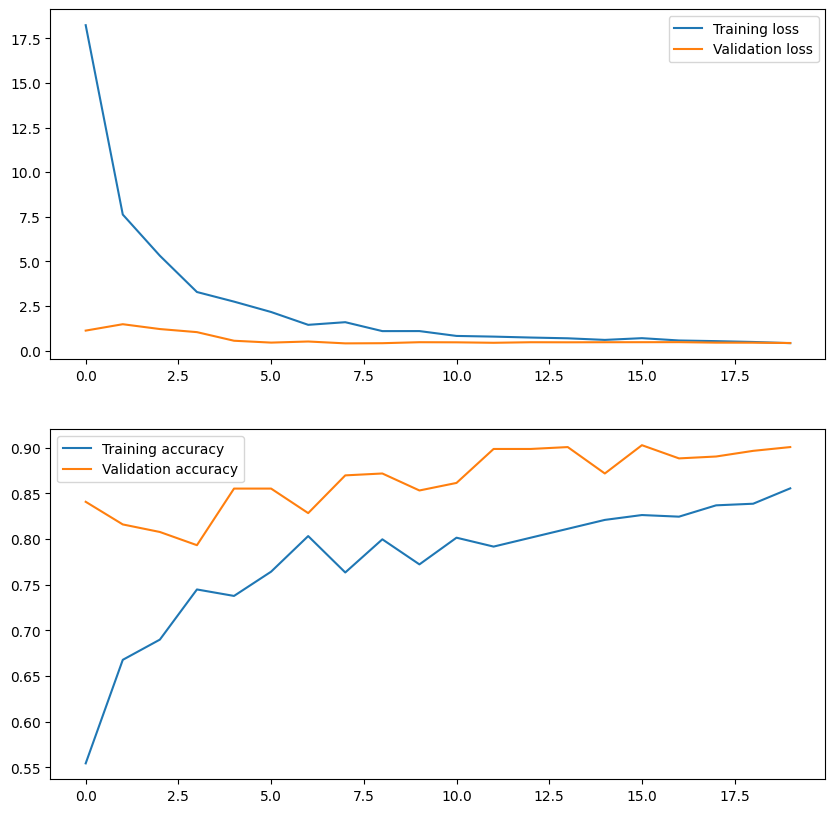

In [28]:
#training history

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
ax[0].plot(history.history['loss'], label="Training loss")
ax[0].plot(history.history['val_loss'], label="Validation loss",)
legend = ax[0].legend(loc='best', fontsize=10)

ax[1].plot(history.history['accuracy'], label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], label="Validation accuracy")
legend = ax[1].legend(loc='best', fontsize=10)

In [29]:
from keras.models import load_model
from sklearn.metrics import accuracy_score

In [30]:
# Define the combinations of (steps_per_epoch, epochs)
combinations = [
    (10, 32), (10, 64), (10, 128),
    (20, 32), (20, 64), (20, 128),
    (50, 32), (50, 64), (50, 128)
]

# Create an empty dataframe to store the accuracy for each combination
accuracy_df = pd.DataFrame(columns=['Epochs', 'Batch Size', 'Accuracy'])

# Loop through each combination
for epochs,batch_size in combinations:
    # Train the model with the specified parameters
    history = model.fit(
        X_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        verbose=0  # Set verbose to 0 to suppress training logs
    )

    # Save the model after each iteration
    model_path = f'model_steps_{batch_size}_epochs_{epochs}.h5'
    model.save(model_path)

    saved_model = load_model(model_path)

    predictions = saved_model.predict(X_test)
    loss, accuracy = model.evaluate(X_test, y_test)

    accuracy_df = accuracy_df._append({'Epochs': epochs, 'Batch Size': batch_size, 'Accuracy': accuracy}, ignore_index=True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.9029


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.9153


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 0s 3ms/step - loss: 0.2796 - accuracy: 0.9194


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.9401


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 0s 2ms/step - loss: 0.2192 - accuracy: 0.9339


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 0s 2ms/step - loss: 0.2199 - accuracy: 0.9380


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9463


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 0s 3ms/step - loss: 0.2131 - accuracy: 0.9401


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9566


In [31]:
accuracy_df

,Epochs,Batch Size,Accuracy
0,10.0,32.0,0.902893
1,10.0,64.0,0.915289
2,10.0,128.0,0.919421
3,20.0,32.0,0.940083
4,20.0,64.0,0.933884
5,20.0,128.0,0.938017
6,50.0,32.0,0.946281
7,50.0,64.0,0.940083
8,50.0,128.0,0.956612


In [32]:
from keras.callbacks import EarlyStopping

In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [34]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,  # You can adjust the number of epochs as needed
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/100
36/36 [==============================] - 0s 7ms/step - loss: 0.1220 - accuracy: 0.9601 - val_loss: 0.2266 - val_accuracy: 0.9483
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.1197 - accuracy: 0.9522 - val_loss: 0.2356 - val_accuracy: 0.9318
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1826 - accuracy: 0.9389 - val_loss: 0.2020 - val_accuracy: 0.9483
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1615 - accuracy: 0.9486 - val_loss: 0.2237 - val_accuracy: 0.9215
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1588 - accuracy: 0.9398 - val_loss: 0.2200 - val_accuracy: 0.9525
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1426 - accuracy: 0.9486 - val_loss: 0.2397 - val_accuracy: 0.9442


In [36]:
# Predict using the early-stopped model
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)



16/16 [==============================] - 0s 2ms/step


In [37]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 33   1  14]
 [  0 124   5]
 [  3   4 300]]


In [38]:
class_report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        48
           1       0.96      0.96      0.96       129
           2       0.94      0.98      0.96       307

    accuracy                           0.94       484
   macro avg       0.94      0.88      0.90       484
weighted avg       0.94      0.94      0.94       484



In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels, predicted_labels)

print("Test Data Accuracy:", accuracy)

Test Data Accuracy: 0.9442148760330579


In [40]:
#predict on train data
predictions_train = model.predict(X_train)
predicted_labels_train = np.argmax(predictions_train, axis=1)
true_labels_train = np.argmax(y_train, axis=1)

36/36 [==============================] - 0s 2ms/step


In [41]:
conf_matrix = confusion_matrix(true_labels_train, predicted_labels_train)
print("Confusion Matrix for train data:")
print(conf_matrix)

Confusion Matrix for train data:
[[105   0  16]
 [  0 307   8]
 [  5   8 680]]


In [42]:
class_report = classification_report(true_labels_train, predicted_labels_train)
print("Classification Report for train data:")
print(class_report)

Classification Report for train data:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       121
           1       0.97      0.97      0.97       315
           2       0.97      0.98      0.97       693

    accuracy                           0.97      1129
   macro avg       0.97      0.94      0.95      1129
weighted avg       0.97      0.97      0.97      1129



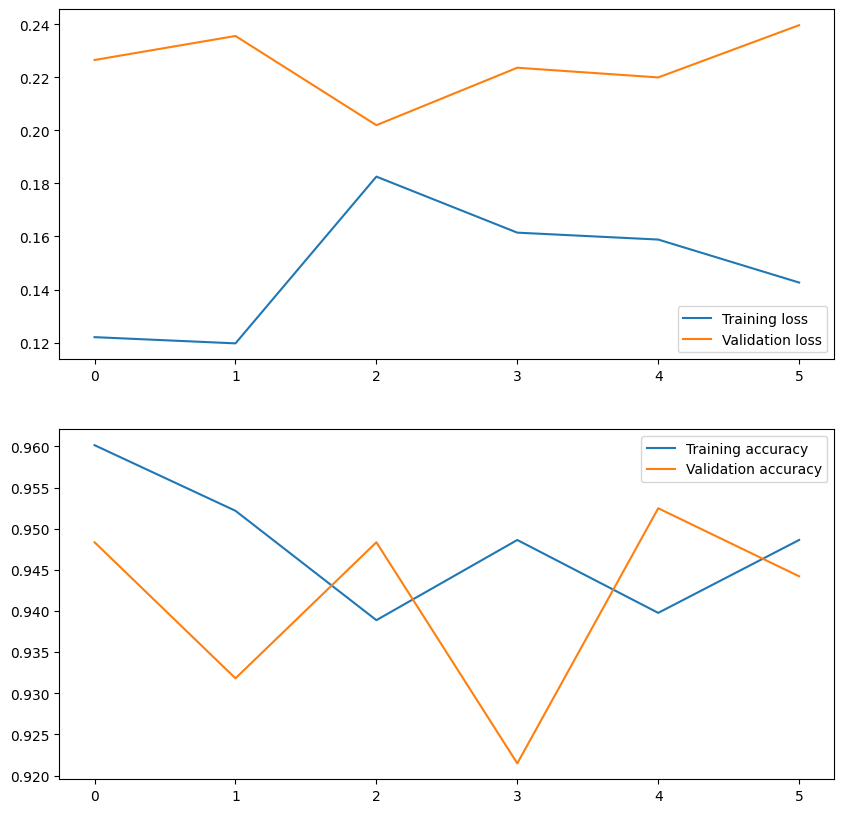

In [43]:
#training history

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
ax[0].plot(history.history['loss'], label="Training loss")
ax[0].plot(history.history['val_loss'], label="Validation loss",)
legend = ax[0].legend(loc='best', fontsize=10)

ax[1].plot(history.history['accuracy'], label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], label="Validation accuracy")
legend = ax[1].legend(loc='best', fontsize=10)